# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:

# plotting
import matplotlib.pyplot as plt

# data cleanup and math
import pandas as pd
import numpy as np
from scipy.stats import linregress

# API requests
import time
import json
import requests

#API key
from api_keys import weather_api_key

# Determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
# reinitializes dataframe
worldWeather_df = pd.DataFrame()


In [4]:
print("Beginning Weather Data Extraction:")
for i, city in enumerate(cities):
    try:
        apiCall = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'
        apiResponse =  requests.get(apiCall)
        jsonWeather = apiResponse.json()
        cityWeather_df = pd.DataFrame(
            {
                "City": city,
                'Longitude': jsonWeather['coord']['lon'],
                'Latitude': jsonWeather['coord']['lat'],
                'Temperature (°c)': jsonWeather['main']['temp']-273.15,
                'Max_Temperature (°c)': jsonWeather['main']['temp_max']-273.15,
                'Humidity': jsonWeather['main']['humidity'],
                'Clouds': jsonWeather['clouds']['all'],
                'Wind Speed': jsonWeather['wind']['speed'],
                'Country': jsonWeather['sys']['country'],
                'Datetime': jsonWeather['dt']
            }, index=[i]
        )

        worldWeather_df = worldWeather_df.append(cityWeather_df)
        print(f'{i} {city} successfully loaded.')

    except:
         print(f'Unable to load {city} data.')
        
print('Extraction Complete.')
    

0 pimentel successfully loaded.
1 hermanus successfully loaded.
Unable to load sentyabrskiy data.
3 lebu successfully loaded.
4 busselton successfully loaded.
5 hobart successfully loaded.
6 rikitea successfully loaded.
7 saint-philippe successfully loaded.
8 walvis bay successfully loaded.
9 mataura successfully loaded.
10 talnakh successfully loaded.
11 bluff successfully loaded.
12 souillac successfully loaded.
13 aklavik successfully loaded.
14 avarua successfully loaded.
15 enterprise successfully loaded.
16 esperance successfully loaded.
Unable to load bargal data.
18 hammerfest successfully loaded.
19 yellowknife successfully loaded.
20 los llanos de aridane successfully loaded.
Unable to load qurbah data.
22 sur successfully loaded.
23 alice springs successfully loaded.
24 cayenne successfully loaded.
25 sembe successfully loaded.
Unable to load marcona data.
27 ranong successfully loaded.
28 solnechnyy successfully loaded.
29 albany successfully loaded.
Unable to load tuggurt 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
def temerature(x):
    f = (x * (9/5)) + 32
    return f

In [10]:
# Reload df after restarting kernel
worldWeather_df = pd.read_csv('./output_data/worldWeather.csv').drop(columns='Unnamed: 0')

In [ ]:
# rename columns to be easily requested
worldWeather_df = worldWeather_df.rename(columns={'Temperature (°c)':"Temperature",'Max_Temperature (°c)':'Max_Temperature'})

In [23]:
#unit change celcius to fahrenheit
worldWeather_df[['Temperature','Max_Temperature']] = worldWeather_df[['Temperature','Max_Temperature']].apply(lambda x: (x * (9/5)) + 32)

In [24]:
worldWeather_df

,City,Longitude,Latitude,Temperature,Max_Temperature,Humidity,Clouds,Wind Speed,Country,Datetime
0,pimentel,-79.9342,-6.8367,64.004,64.004,85,0,1.34,PE,1619747019
1,hermanus,19.2345,-34.4187,50.000,50.000,92,58,1.54,ZA,1619746906
2,lebu,-73.6500,-37.6167,55.058,55.058,95,100,3.57,CL,1619746911
3,busselton,115.3333,-33.6500,55.256,55.994,92,9,0.45,AU,1619747021
4,hobart,147.3294,-42.8794,63.662,66.002,72,20,4.12,AU,1619746821
...,...,...,...,...,...,...,...,...,...,...
565,sri aman,111.4621,1.2376,75.200,75.200,100,40,0.61,MY,1619747391
566,gwanda,29.0000,-20.9333,61.628,61.628,65,44,2.18,ZW,1619747391
567,bathsheba,-59.5167,13.2167,77.000,77.000,61,20,4.63,BB,1619747392
568,manitouwadge,-85.8403,49.1215,41.000,41.000,70,51,1.54,CA,1619747393


In [25]:
#save df as csv
worldWeather_df.to_csv('./output_data/worldWeather.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [17]:
# No cities with humidity greater than 100
query = len(worldWeather_df.query('Humidity > 100'))
print(f'There are {query} cities with humidity > 100%.')


There are 0 cities with humidity > 100%.


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [26]:
# metrics of interest
y_values = ['Max_Temperature','Humidity','Clouds','Wind Speed']

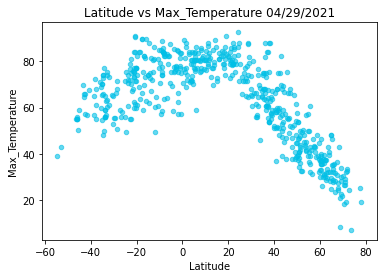

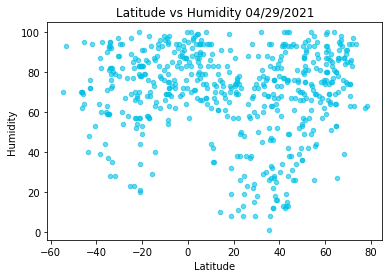

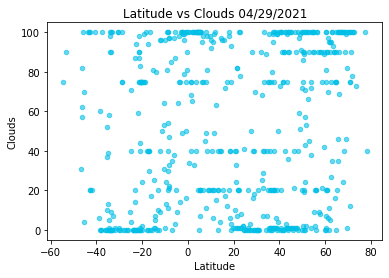

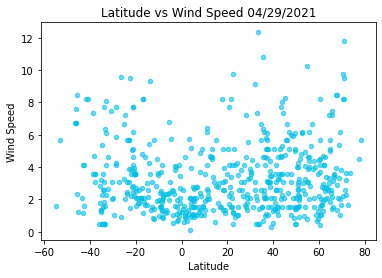

In [27]:
for metric in y_values:
    x = worldWeather_df['Latitude']
    y = worldWeather_df[metric]
    analysisDate = '04/29/2021'

    fig, ax = plt.subplots()
    scatter = ax.scatter(x, y, s=20,color=(0,.75,.9),alpha=.6)
    plt.title(x.name+' vs '+y.name + ' '+ analysisDate)
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    plt.savefig(f'./output_data/{y.name}.png')
    plt.show()

Of our y values compared to latitude, Temperature is the only clear scatter with a correlation, which should be the case logically. 
Cloud Coverage, humidity, and wind speed show no relation to latitude, with the only relevant information to be gained from the graph being an idea of average humidity across the latitude of Earth clustering around 60-70%. 


## Linear Regression

In [28]:
# split dataframe into two hemispheres
northWeather_df = worldWeather_df[worldWeather_df['Latitude'] >= 0]
southWeather_df = worldWeather_df[worldWeather_df['Latitude'] < 0]

####  Northern and Southern Linear Regression per metrics

In [29]:
# metrics of interest
y_values = ['Max_Temperature','Humidity','Clouds','Wind Speed']

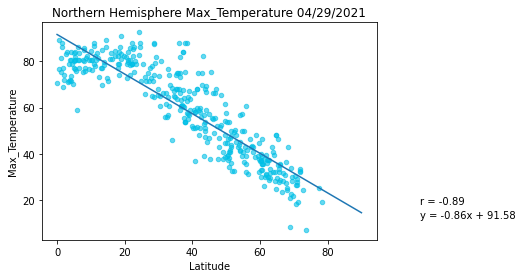

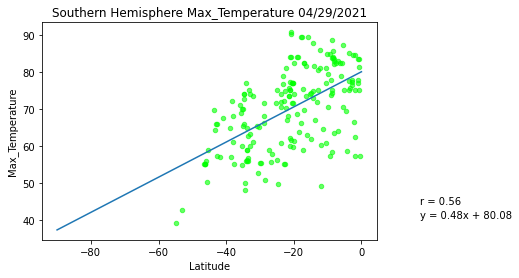

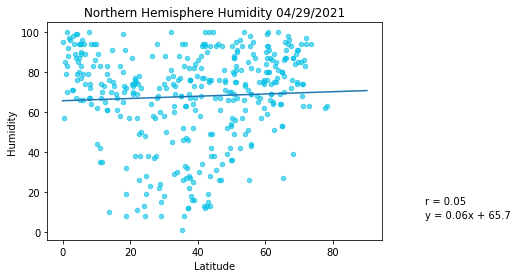

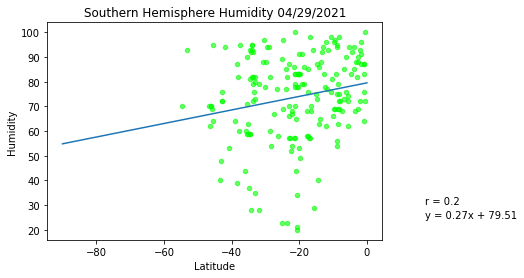

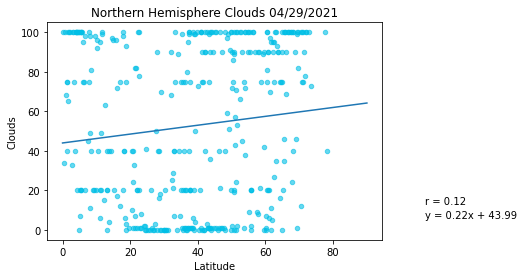

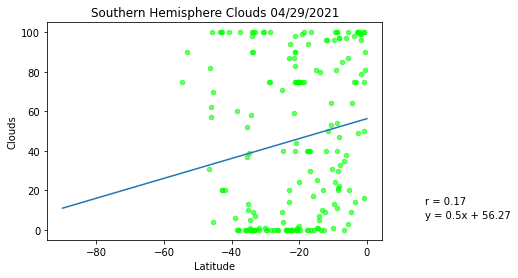

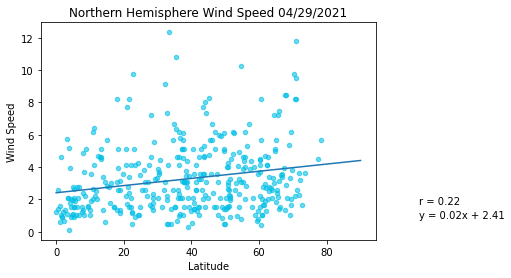

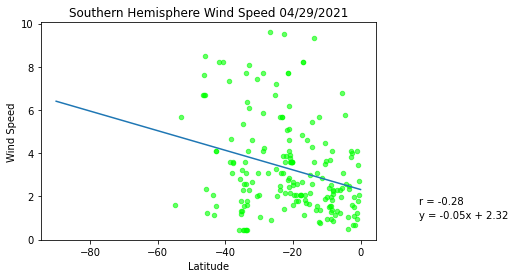

In [30]:
for metric in y_values:
    #use northern data for metrics
    x1 = northWeather_df['Latitude']
    y1 = northWeather_df[metric]
    analysisDate = '04/29/2021'
    
    #lin reg line
    slope, intercept, rvalue, pvalue, stderr = linregress(x1,y1)
    z = range(0,100,10)
    w = slope * z + intercept
    
    #Scatter plot and lin reg line Northern
    fig, ax = plt.subplots()
    scatter = ax.scatter(x1, y1, s=20,color=(0,.75,.9),alpha=.6)
    
    plt.plot(z,w)
    plt.text(1,.25,f'r = {round(rvalue,2)}', transform=plt.gcf().transFigure)
    plt.text(1,.20,f'y = {round(slope,2)}x + {round(intercept,2)}', transform=plt.gcf().transFigure)
    
    #Formatting
    plt.title('Northern Hemisphere '+y1.name + ' '+ analysisDate)
    plt.xlabel(x1.name)
    plt.ylabel(y1.name)
    
    #Save figure and display
    plt.savefig(f'./output_data/North{y1.name}Line.png')
    plt.show()
    
    #Use southern data set on metrics
    x2 = southWeather_df['Latitude']
    y2 = southWeather_df[metric]

    #linear regression line
    slope, intercept, rvalue, pvalue, stderr = linregress(x2,y2)
    z = range(-90,10,10)
    w = slope * z + intercept

    #Scatter plot and lin reg line Southern
    fig, ax = plt.subplots()
    scatter = ax.scatter(x2, y2, s=20,color=(0,1,0),alpha=.6)
    
    plt.plot(z,w)
    plt.text(1,.25,f'r = {round(rvalue,2)}', transform=plt.gcf().transFigure)
    plt.text(1,.20,f'y = {round(slope,2)}x + {round(intercept,2)}', transform=plt.gcf().transFigure)
    
    #Formatting
    plt.title('Southern Hemisphere '+y2.name + ' '+ analysisDate)
    plt.xlabel(x2.name)
    plt.ylabel(y2.name)
    
    #Save figure and display
    plt.savefig(f'./output_data/South{y2.name}Line.png')
    plt.show()

Once again, temperature vs latitude has the most promising correlation, with a promising r value in the Northern Hemisphere. Southern Hemisphere data is not as well fit to the line, but is still closer than the other metrics tested in this case. 